# Data analysis

In [1]:
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path

Data dir containing all files

In [2]:
!ls -la /home/ashinde/PhD/CaffineBravery/

total 48
drwxr-xr-x 21 ashinde ashinde 4096 Feb 16 13:21 .
drwxrwxr-x  6 ashinde ashinde   84 Dec  7 19:05 ..
drwxr-xr-x  7 ashinde ashinde  124 Nov 15 11:34 app
drwxr-xr-x  4 ashinde ashinde  142 Oct 15 15:33 domains
drwxr-xr-x  8 ashinde ashinde  220 Feb 16 16:13 .git
-rw-r--r--  1 ashinde ashinde  154 May 24  2022 .gitattributes
-rw-r--r--  1 ashinde ashinde  129 May 24  2022 .gitignore
drwxrwxr-x  6 ashinde ashinde   73 Jun  7  2022 .gradle
drwxr-xr-x  3 ashinde ashinde   21 May 24  2022 gradle
-rwxr-xr-x  1 ashinde ashinde 5774 May 24  2022 gradlew
-rw-r--r--  1 ashinde ashinde 2763 May 24  2022 gradlew.bat
drwxrwxr-x  2 ashinde ashinde   52 Jul 19  2022 policies
-rw-rw-r--  1 ashinde ashinde  743 Jun  7  2022 .project
drwxrwxr-x  2 ashinde ashinde   62 Nov 29 12:57 results
drwxrwxr-x  2 ashinde ashinde  101 Feb  1 18:21 results_l1_active
drwxrwxr-x  2 ashinde ashinde  108 Feb 16 15:17 results_l1_active_control
drwxrwxr-x  2 ashinde ashinde  100 Nov 29 21:44 results_l1_active_crit

In [3]:
# Data files
data_dir = Path("/home/ashinde/PhD/CaffineBravery/results_l2_control/")
data_files = list(data_dir.iterdir())

graph_files = list(filter(lambda x: "pol_graph" in str(x), data_files))
print(f"Policy graph files: {graph_files}")

trace_file = list(filter(lambda x: "trace" in str(x), data_files))[0]
print(f"Trace file: {trace_file}")

Policy graph files: [PosixPath('/home/ashinde/PhD/CaffineBravery/results_l2_control/1034094674_attl0_pol_graph.json'), PosixPath('/home/ashinde/PhD/CaffineBravery/results_l2_control/1474957626_attl0_pol_graph.json'), PosixPath('/home/ashinde/PhD/CaffineBravery/results_l2_control/1280429864_attl0_pol_graph.json'), PosixPath('/home/ashinde/PhD/CaffineBravery/results_l2_control/181252244_attl0_pol_graph.json'), PosixPath('/home/ashinde/PhD/CaffineBravery/results_l2_control/1424108509_defl1_active_pol_graph.json'), PosixPath('/home/ashinde/PhD/CaffineBravery/results_l2_control/1202220987_defl1_passive_pol_graph.json'), PosixPath('/home/ashinde/PhD/CaffineBravery/results_l2_control/94919826_attl2_pol_graph.json')]
Trace file: /home/ashinde/PhD/CaffineBravery/results_l2_control/trace.json


In [4]:
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

In [5]:
# Draw policy graphs
def to_networkx_graph(json_data):

    nodes = json_data["nodes"]
    edges = json_data["edges"]

    G = networkx.MultiDiGraph()
    labels = {}
    edge_labels = {}
    edge_print = {}

    for k, v in nodes.items():
        
        if "start" in v.keys():
            labels[k] = f"start_{v['act']}"
        else:
            labels[k] = v["act"]
        G.add_node(k)
        
    for n, e in edges.items():
        for l, _n in e.items():
            G.add_edge(n, _n, label=l)
            
            e_data = G.get_edge_data(n, _n)
            label = [l["label"] for l in e_data.values()]
            # print(label)
            edge_labels[(n, _n)] = list(e_data.keys())

    # pos = networkx.shell_layout(G, scale=1)
    # networkx.draw_networkx_labels(G, pos, labels)
    
    print(G)
    pos = networkx.nx_pydot.graphviz_layout(G, prog="neato")
    networkx.draw(G, pos, labels=labels, with_labels=True, font_size=8, alpha=0.5, width=0.2)
    plotter.show()

---
## Plot policy graphs

/home/ashinde/PhD/CaffineBravery/results_l2_control/1034094674_attl0_pol_graph.json
MultiDiGraph with 14 nodes and 104 edges


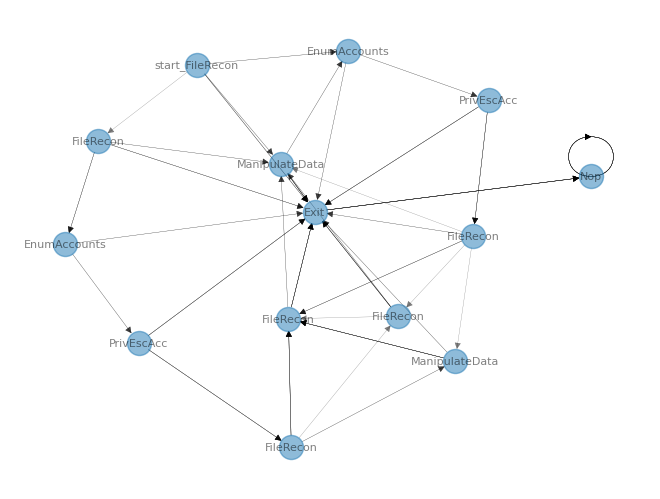

/home/ashinde/PhD/CaffineBravery/results_l2_control/1474957626_attl0_pol_graph.json
MultiDiGraph with 11 nodes and 84 edges


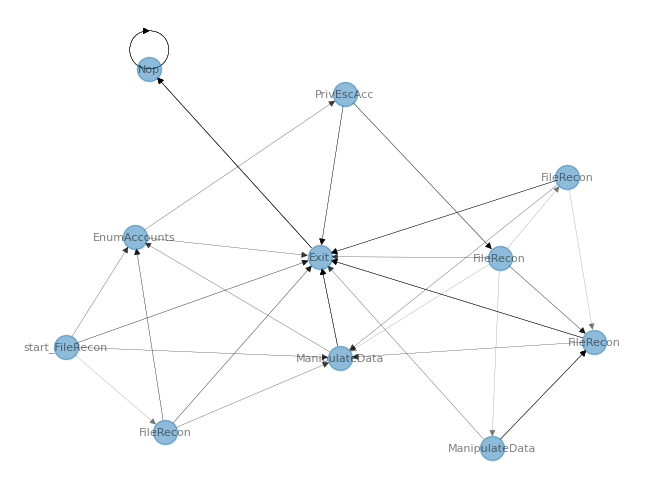

/home/ashinde/PhD/CaffineBravery/results_l2_control/1280429864_attl0_pol_graph.json
MultiDiGraph with 10 nodes and 76 edges


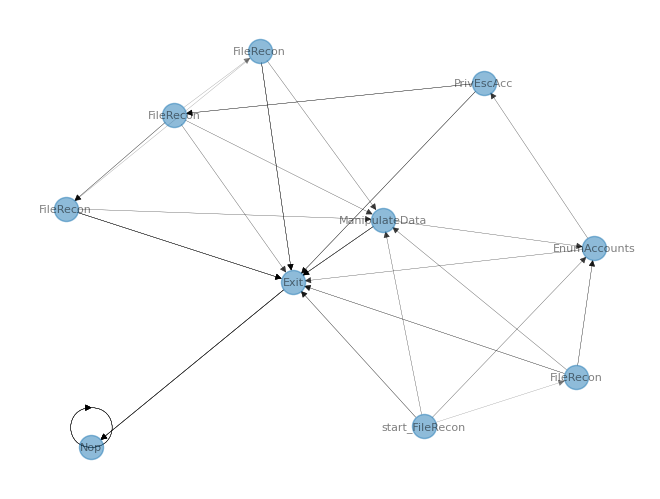

/home/ashinde/PhD/CaffineBravery/results_l2_control/181252244_attl0_pol_graph.json
MultiDiGraph with 11 nodes and 84 edges


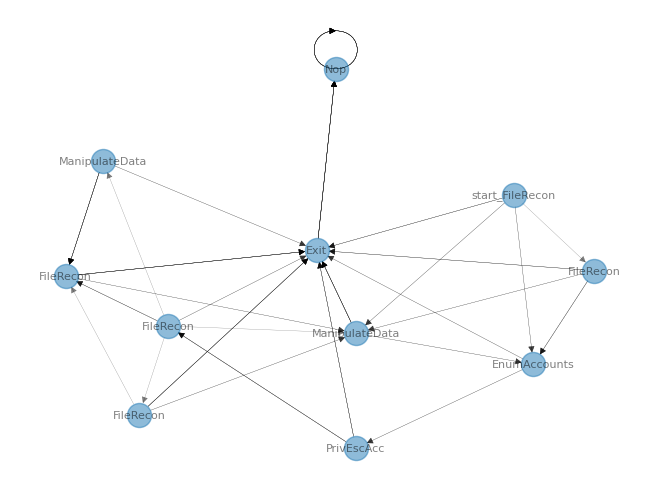

/home/ashinde/PhD/CaffineBravery/results_l2_control/1424108509_defl1_active_pol_graph.json
MultiDiGraph with 10 nodes and 40 edges


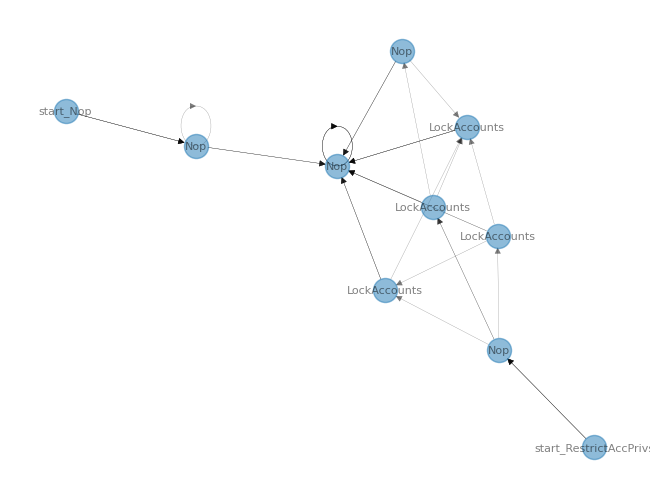

/home/ashinde/PhD/CaffineBravery/results_l2_control/1202220987_defl1_passive_pol_graph.json
MultiDiGraph with 8 nodes and 32 edges


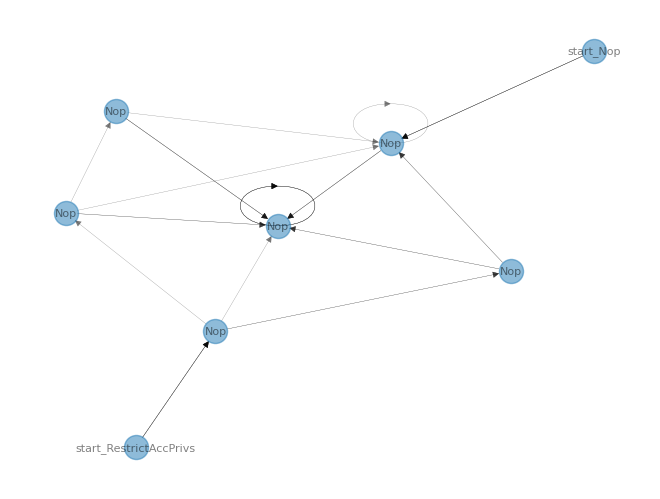

/home/ashinde/PhD/CaffineBravery/results_l2_control/94919826_attl2_pol_graph.json
MultiDiGraph with 11 nodes and 170 edges


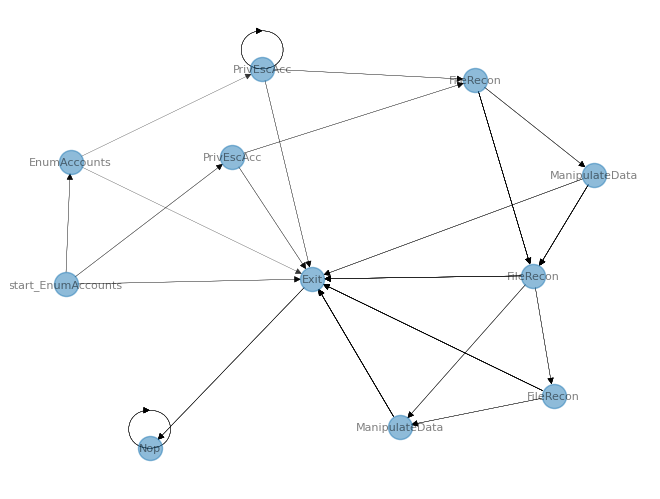

In [6]:
for g in graph_files:
    print(g)
    data = load_json(g)
    to_networkx_graph(data)

---
## Beliefs 

In [7]:
import summarize_interaction

# load json data
data = load_json(trace_file)

keys, b_traces = summarize_interaction.get_all_belief_traces(data)

print("Plotting belief divergence over")
for k in keys:
    print(k)

Plotting belief divergence over
('HostType', ['critical', 'critical_honeypot', 'honeypot'])
('HostHasData', ['no', 'yes'])
('DataPrivs', ['root', 'user'])
('EscAccounts', ['no', 'yes'])
('AccFound', ['no', 'yes'])
('DataFound', ['no', 'yes'])
('AccessLevel', ['root', 'user'])
('AttActive', ['no', 'yes'])
('DataInjected', ['no', 'yes'])


Plotting for ('HostType', ['critical', 'critical_honeypot', 'honeypot'])


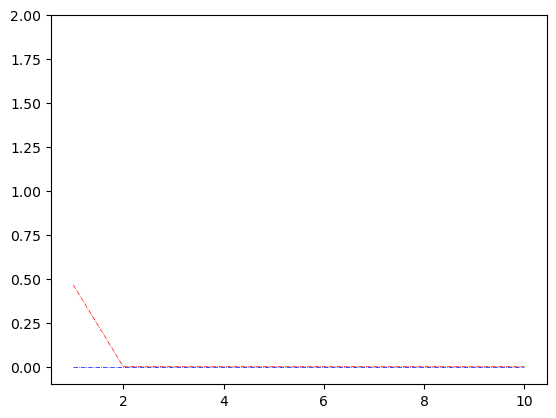

Plotting for ('HostHasData', ['no', 'yes'])


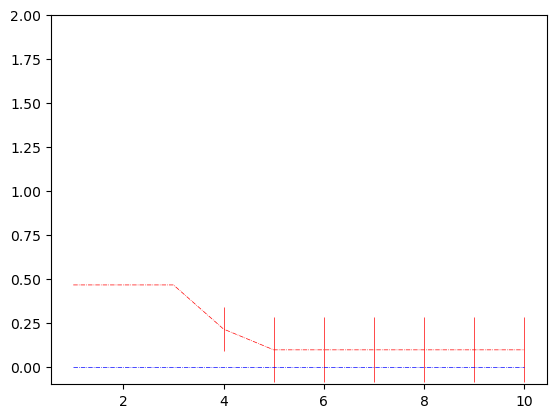

Plotting for ('DataPrivs', ['root', 'user'])


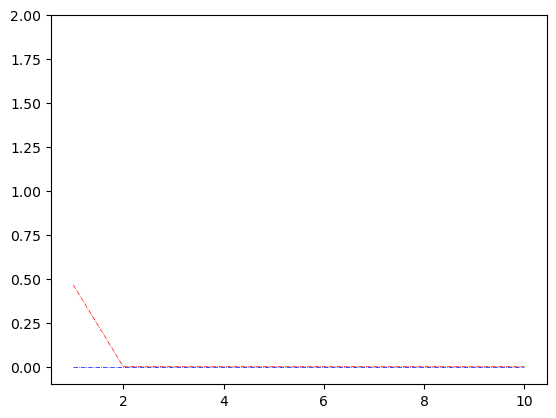

Plotting for ('EscAccounts', ['no', 'yes'])


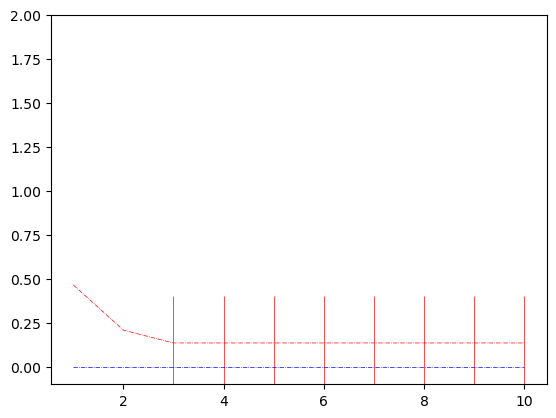

Plotting for ('AccFound', ['no', 'yes'])


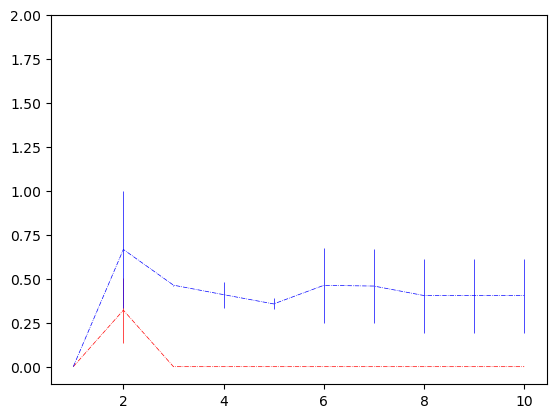

Plotting for ('DataFound', ['no', 'yes'])


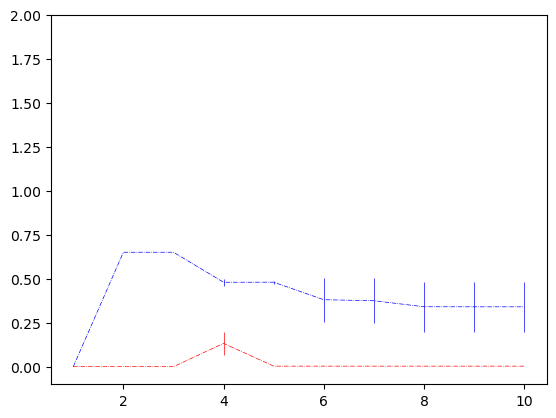

Plotting for ('AccessLevel', ['root', 'user'])


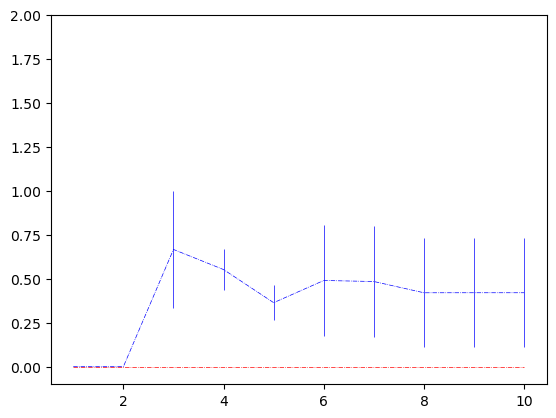

Plotting for ('AttActive', ['no', 'yes'])


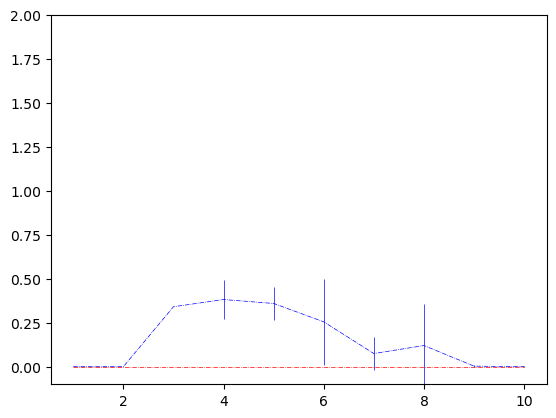

Plotting for ('DataInjected', ['no', 'yes'])


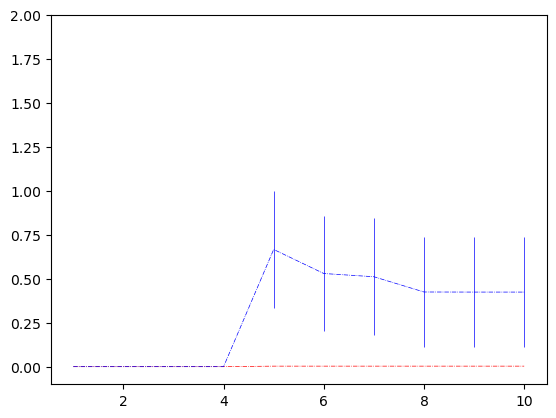

In [8]:
# Get divergence
divs = []
for b_trace in b_traces:
    divs.append(summarize_interaction.get_divergence(b_trace))
    
for i in range(len(keys)):
    print(f"Plotting for {keys[i]}")
    
    i_means = numpy.mean(divs[i][0], axis=0)
    i_dev = numpy.std(divs[i][0], axis=0)
    plotter.errorbar(numpy.linspace(1, i_means.shape[0], i_means.shape[0]), i_means, fmt='r-.', yerr=i_dev, linewidth=0.5)
    
    if len(divs[i]) > 1:
        j_means = numpy.mean(divs[i][1], axis=0)
        j_dev = numpy.std(divs[i][1], axis=0)
        plotter.errorbar(numpy.linspace(1, j_means.shape[0], j_means.shape[0]), j_means, fmt='b-.', yerr=j_dev, linewidth=0.5)
        # plotter.plot(divs[i][1].T, 'b-.', linewidth=0.5)
    
    plotter.ylim(-0.1, 2)
    plotter.show()
    

---
# Display interaction examples

,i_acts,"[""AccessPerm'"", ""HostObs'"", ""ActionResult'"", ""ConnStatus'"", ""DefenseObs'""]",j_acts,"[""EndPtAlerts'""]"
0,EnumAccounts,denied|none|success|active|perms_change,RestrictAccPrivs,file_enum
1,PrivEscAcc,denied|none|failure|active|none,Nop,login_activity
2,Exit,denied|user_files|failure|terminated|none,Nop,file_enum
3,Nop,auth|user_files|success|terminated|none,Nop,none
4,Nop,auth|user_files|failure|terminated|none,Nop,none
5,Nop,denied|user_files|failure|terminated|none,Nop,none
6,Nop,denied|user_files|success|terminated|none,Nop,none
7,Nop,denied|none|success|terminated|none,Nop,none
8,Nop,denied|none|failure|terminated|none,Nop,none
9,Nop,denied|user_files|failure|terminated|none,Nop,none


Agent i's P(Aj)


,DecoyAccount,DeployData,LockAccounts,Nop,RestrictAccPrivs
0,0.0,0.0,0.000000,0.500000,0.5
1,0.0,0.0,0.000000,1.000000,0.0
2,0.0,0.0,0.500000,0.500000,0.0
3,0.0,0.0,0.026250,0.973750,0.0
4,0.0,0.0,0.001187,0.998812,0.0
5,0.0,0.0,0.000000,1.000000,0.0
6,0.0,0.0,0.000000,1.000000,0.0
7,0.0,0.0,0.000000,1.000000,0.0
8,0.0,0.0,0.000000,1.000000,0.0
9,0.0,0.0,0.000000,1.000000,0.0


Agent j's P(Aj)


,EnumAccounts,Exit,FileRecon,ManipulateData,Nop,PrivEscAcc
0,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000
1,6.300000e-01,2.970000e-01,6.300000e-02,1.000000e-02,0.000000,0.000000
2,4.689000e-02,1.867600e-01,0.000000e+00,3.150000e-03,0.297000,0.466200
3,8.989766e-04,1.265143e-01,2.591644e-01,0.000000e+00,0.276396,0.337026
4,0.000000e+00,1.370621e-03,4.805769e-02,3.066548e-02,0.919817,0.000089
5,3.681766e-07,2.048815e-03,6.925338e-04,2.265749e-03,0.994992,0.000000
6,2.806152e-07,1.388489e-04,3.200354e-06,3.219441e-05,0.999825,0.000000
7,2.434189e-08,1.923101e-06,3.625259e-10,1.508168e-07,0.999998,0.000000
8,1.464058e-09,8.843627e-09,0.000000e+00,1.709117e-11,1.000000,0.000000
9,8.612467e-11,1.001731e-12,0.000000e+00,0.000000e+00,1.000000,0.000000


,highCap,lowCap
0,0.5,0.5
1,0.5,0.5
2,0.5,0.5
3,0.5,0.5
4,0.5,0.5
5,0.5,0.5
6,0.5,0.5
7,0.5,0.5
8,0.5,0.5
9,0.5,0.5


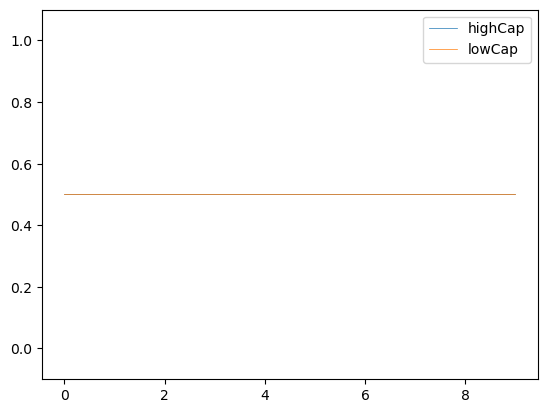

,att
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


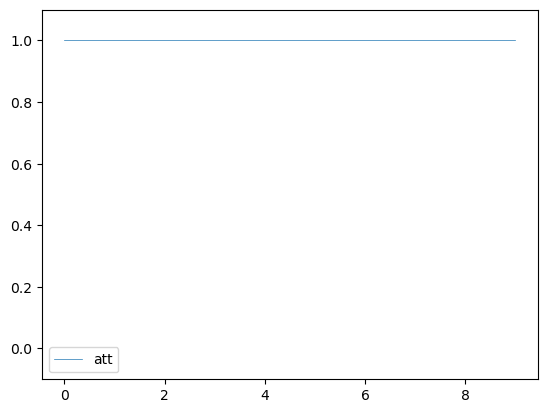

,i_acts,"[""AccessPerm'"", ""HostObs'"", ""ActionResult'"", ""ConnStatus'"", ""DefenseObs'""]",j_acts,"[""EndPtAlerts'""]"
0,EnumAccounts,denied|none|success|active|perms_change,RestrictAccPrivs,file_enum
1,PrivEscAcc,auth|user_files|success|active|none,Nop,login_activity
2,FileRecon,auth|none|success|active|none,Nop,file_enum
3,ManipulateData,auth|none|success|active|none,Nop,file_write
4,Exit,auth|user_files|failure|terminated|none,Nop,none
5,Nop,denied|none|failure|terminated|none,Nop,none
6,Nop,denied|none|success|terminated|none,Nop,none
7,Nop,auth|user_files|success|terminated|none,Nop,none
8,Nop,auth|user_files|failure|terminated|none,Nop,none
9,Nop,auth|none|failure|terminated|none,Nop,file_enum


Agent i's P(Aj)


,DecoyAccount,DeployData,LockAccounts,Nop,RestrictAccPrivs
0,0.0,0.0,0.000000,0.500000,0.5
1,0.0,0.0,0.000000,1.000000,0.0
2,0.0,0.0,0.500000,0.500000,0.0
3,0.0,0.0,0.040595,0.959405,0.0
4,0.0,0.0,0.000112,0.999888,0.0
5,0.0,0.0,0.000000,1.000000,0.0
6,0.0,0.0,0.000000,1.000000,0.0
7,0.0,0.0,0.000000,1.000000,0.0
8,0.0,0.0,0.000000,1.000000,0.0
9,0.0,0.0,0.000000,1.000000,0.0


Agent j's P(Aj)


,EnumAccounts,Exit,FileRecon,ManipulateData,Nop,PrivEscAcc
0,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000
1,6.300000e-01,2.970000e-01,6.300000e-02,1.000000e-02,0.000000,0.000000
2,4.689000e-02,1.867600e-01,0.000000e+00,3.150000e-03,0.297000,0.466200
3,8.989766e-04,1.265143e-01,2.591644e-01,0.000000e+00,0.276396,0.337026
4,0.000000e+00,1.020642e-02,3.578651e-01,2.283527e-01,0.402911,0.000665
5,5.670382e-06,3.155432e-02,1.066589e-02,3.489537e-02,0.922879,0.000000
6,4.502905e-06,2.228045e-03,5.135463e-05,5.166092e-04,0.997200,0.000000
7,3.908007e-07,3.087473e-05,5.820228e-09,2.421311e-06,0.999966,0.000000
8,2.350500e-08,1.419817e-07,0.000000e+00,2.743936e-10,1.000000,0.000000
9,1.382705e-09,1.608249e-11,0.000000e+00,0.000000e+00,1.000000,0.000000


,highCap,lowCap
0,0.500000,0.500000
1,0.500000,0.500000
2,0.500000,0.500000
3,0.047619,0.952381
4,0.009417,0.990583
5,0.009417,0.990583
6,0.009417,0.990583
7,0.009417,0.990583
8,0.009417,0.990583
9,0.009417,0.990583


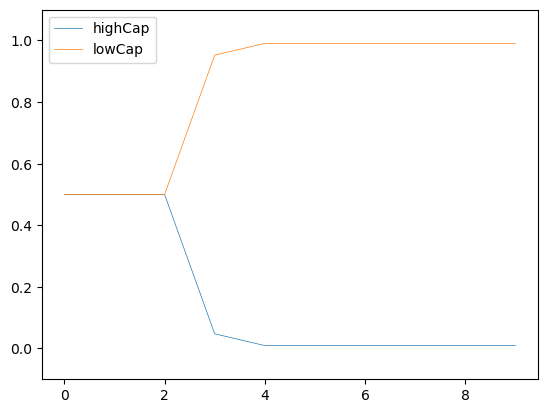

,att
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


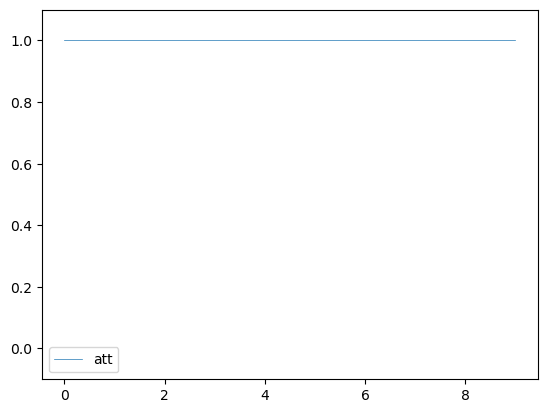

,i_acts,"[""AccessPerm'"", ""HostObs'"", ""ActionResult'"", ""ConnStatus'"", ""DefenseObs'""]",j_acts,"[""EndPtAlerts'""]"
0,EnumAccounts,denied|none|success|active|perms_change,RestrictAccPrivs,file_enum
1,PrivEscAcc,auth|user_files|success|active|none,Nop,login_activity
2,FileRecon,auth|user_files|success|active|none,Nop,file_enum
3,ManipulateData,auth|none|success|active|none,Nop,file_write
4,Exit,denied|user_files|success|terminated|none,Nop,none
5,Nop,denied|user_files|failure|terminated|none,Nop,file_enum
6,Nop,auth|user_files|success|terminated|none,Nop,file_write
7,Nop,auth|user_files|success|terminated|none,Nop,none
8,Nop,auth|user_files|success|terminated|none,Nop,none
9,Nop,denied|user_files|success|terminated|none,Nop,none


Agent i's P(Aj)


,DecoyAccount,DeployData,LockAccounts,Nop,RestrictAccPrivs
0,0.0,0.0,0.000000,0.500000,0.5
1,0.0,0.0,0.000000,1.000000,0.0
2,0.0,0.0,0.500000,0.500000,0.0
3,0.0,0.0,0.040595,0.959405,0.0
4,0.0,0.0,0.000112,0.999888,0.0
5,0.0,0.0,0.000000,1.000000,0.0
6,0.0,0.0,0.000000,1.000000,0.0
7,0.0,0.0,0.000000,1.000000,0.0
8,0.0,0.0,0.000000,1.000000,0.0
9,0.0,0.0,0.000000,1.000000,0.0


Agent j's P(Aj)


,EnumAccounts,Exit,FileRecon,ManipulateData,Nop,PrivEscAcc
0,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000
1,0.630000,2.970000e-01,0.063000,0.010000,0.000000,0.000000
2,0.046890,1.867600e-01,0.000000,0.003150,0.297000,0.466200
3,0.000899,1.265143e-01,0.259164,0.000000,0.276396,0.337026
4,0.000000,1.020642e-02,0.357865,0.228353,0.402911,0.000665
5,0.000006,3.155432e-02,0.010666,0.034895,0.922879,0.000000
6,0.000140,5.485147e-02,0.007716,0.122057,0.815236,0.000000
7,0.002954,7.001503e-01,0.000058,0.002183,0.294655,0.000000
8,0.000175,1.295859e-04,0.000000,0.000003,0.999693,0.000000
9,0.000010,1.505868e-07,0.000000,0.000000,0.999989,0.000000


,highCap,lowCap
0,0.500000,0.500000
1,0.500000,0.500000
2,0.500000,0.500000
3,0.047619,0.952381
4,0.009417,0.990583
5,0.009417,0.990583
6,0.009417,0.990583
7,0.009417,0.990583
8,0.009417,0.990583
9,0.009417,0.990583


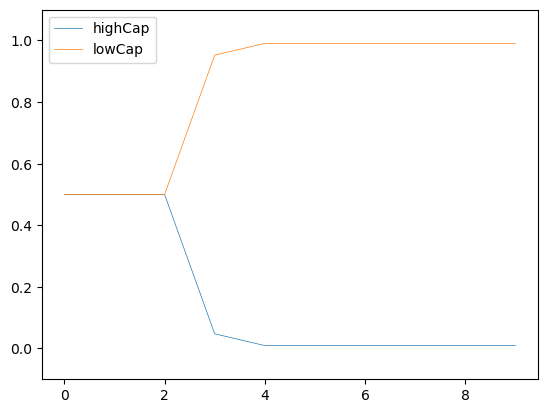

,att
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


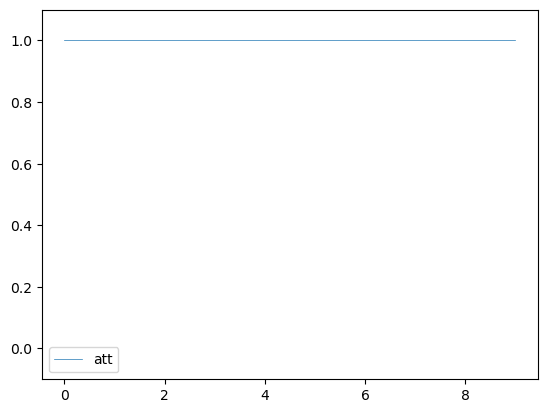

,i_acts,"[""AccessPerm'"", ""HostObs'"", ""ActionResult'"", ""ConnStatus'"", ""DefenseObs'""]",j_acts,"[""EndPtAlerts'""]"
0,EnumAccounts,denied|user_files|success|active|perms_change,RestrictAccPrivs,file_enum
1,PrivEscAcc,auth|user_files|failure|active|none,Nop,login_activity
2,FileRecon,auth|user_files|success|active|none,Nop,file_enum
3,ManipulateData,auth|user_files|success|active|none,Nop,file_write
4,Exit,denied|none|success|terminated|none,Nop,none
5,Nop,auth|none|success|terminated|none,Nop,none
6,Nop,auth|none|success|terminated|none,Nop,none
7,Nop,denied|user_files|success|terminated|none,Nop,file_write
8,Nop,auth|none|success|terminated|none,Nop,none
9,Nop,auth|none|failure|terminated|none,Nop,none


Agent i's P(Aj)


,DecoyAccount,DeployData,LockAccounts,Nop,RestrictAccPrivs
0,0.0,0.0,0.000000,0.500000,0.5
1,0.0,0.0,0.000000,1.000000,0.0
2,0.0,0.0,0.500000,0.500000,0.0
3,0.0,0.0,0.040595,0.959405,0.0
4,0.0,0.0,0.000112,0.999888,0.0
5,0.0,0.0,0.000000,1.000000,0.0
6,0.0,0.0,0.000000,1.000000,0.0
7,0.0,0.0,0.000000,1.000000,0.0
8,0.0,0.0,0.000000,1.000000,0.0
9,0.0,0.0,0.000000,1.000000,0.0


Agent j's P(Aj)


,EnumAccounts,Exit,FileRecon,ManipulateData,Nop,PrivEscAcc
0,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000
1,6.300000e-01,2.970000e-01,6.300000e-02,1.000000e-02,0.000000,0.000000
2,4.689000e-02,1.867600e-01,0.000000e+00,3.150000e-03,0.297000,0.466200
3,8.989766e-04,1.265143e-01,2.591644e-01,0.000000e+00,0.276396,0.337026
4,0.000000e+00,1.020642e-02,3.578651e-01,2.283527e-01,0.402911,0.000665
5,5.670382e-06,3.155432e-02,1.066589e-02,3.489537e-02,0.922879,0.000000
6,4.502905e-06,2.228045e-03,5.135463e-05,5.166092e-04,0.997200,0.000000
7,3.908007e-07,3.087473e-05,5.820228e-09,2.421311e-06,0.999966,0.000000
8,5.400950e-07,4.101253e-05,0.000000e+00,4.664499e-09,0.999958,0.000000
9,3.177130e-08,2.733912e-10,0.000000e+00,0.000000e+00,1.000000,0.000000


,highCap,lowCap
0,0.500000,0.500000
1,0.500000,0.500000
2,0.500000,0.500000
3,0.047619,0.952381
4,0.009417,0.990583
5,0.009417,0.990583
6,0.009417,0.990583
7,0.009417,0.990583
8,0.009417,0.990583
9,0.009417,0.990583


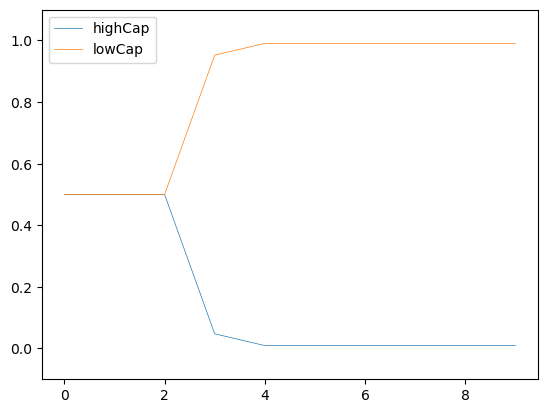

,att
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


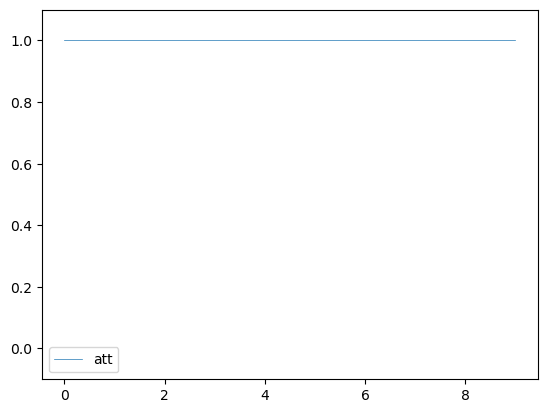

,i_acts,"[""AccessPerm'"", ""HostObs'"", ""ActionResult'"", ""ConnStatus'"", ""DefenseObs'""]",j_acts,"[""EndPtAlerts'""]"
0,EnumAccounts,denied|none|success|active|perms_change,RestrictAccPrivs,file_enum
1,PrivEscAcc,auth|none|failure|active|none,Nop,login_activity
2,FileRecon,auth|none|success|active|none,Nop,file_enum
3,ManipulateData,auth|none|success|active|none,Nop,file_write
4,Exit,auth|none|failure|terminated|none,Nop,file_write
5,Nop,auth|user_files|success|terminated|none,Nop,none
6,Nop,denied|none|success|terminated|none,Nop,none
7,Nop,auth|user_files|failure|terminated|none,Nop,none
8,Nop,auth|user_files|failure|terminated|none,Nop,none
9,Nop,denied|user_files|success|terminated|none,Nop,none


Agent i's P(Aj)


,DecoyAccount,DeployData,LockAccounts,Nop,RestrictAccPrivs
0,0.0,0.0,0.000000,0.500000,0.5
1,0.0,0.0,0.000000,1.000000,0.0
2,0.0,0.0,0.500000,0.500000,0.0
3,0.0,0.0,0.040595,0.959405,0.0
4,0.0,0.0,0.000112,0.999888,0.0
5,0.0,0.0,0.000000,1.000000,0.0
6,0.0,0.0,0.000000,1.000000,0.0
7,0.0,0.0,0.000000,1.000000,0.0
8,0.0,0.0,0.000000,1.000000,0.0
9,0.0,0.0,0.000000,1.000000,0.0


Agent j's P(Aj)


,EnumAccounts,Exit,FileRecon,ManipulateData,Nop,PrivEscAcc
0,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000
1,6.300000e-01,2.970000e-01,6.300000e-02,1.000000e-02,0.000000,0.000000
2,4.689000e-02,1.867600e-01,0.000000e+00,3.150000e-03,0.297000,0.466200
3,8.989766e-04,1.265143e-01,2.591644e-01,0.000000e+00,0.276396,0.337026
4,0.000000e+00,1.020642e-02,3.578651e-01,2.283527e-01,0.402911,0.000665
5,1.576324e-04,8.353239e-01,1.868298e-02,5.706268e-02,0.088773,0.000000
6,1.698826e-05,3.770767e-03,8.655989e-05,9.340892e-04,0.995192,0.000000
7,1.225293e-06,5.577907e-05,9.814481e-09,4.082986e-06,0.999939,0.000000
8,7.294769e-08,2.394203e-07,0.000000e+00,4.627031e-10,1.000000,0.000000
9,4.291139e-09,2.711950e-11,0.000000e+00,0.000000e+00,1.000000,0.000000


,highCap,lowCap
0,0.500000,0.500000
1,0.500000,0.500000
2,0.500000,0.500000
3,0.047619,0.952381
4,0.009417,0.990583
5,0.009417,0.990583
6,0.009417,0.990583
7,0.009417,0.990583
8,0.009417,0.990583
9,0.009417,0.990583


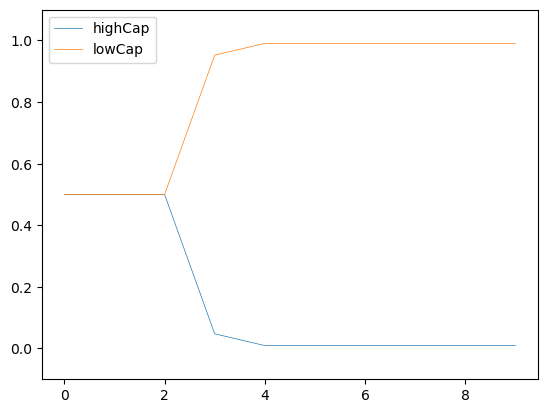

,att
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


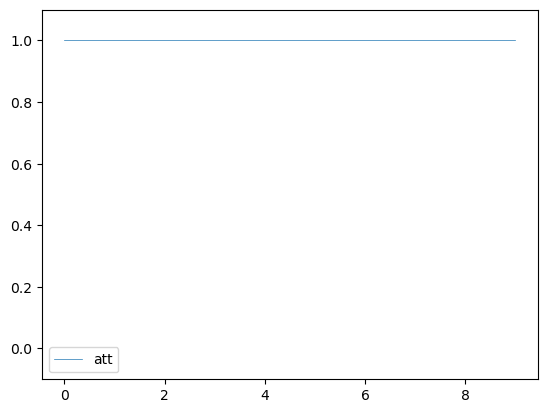

In [9]:
from IPython.display import display, HTML
from functools import reduce

for trace in data[:5]:
    actions = summarize_interaction.pull_actions(trace)
    display(actions)
    
    try:
        frame_beliefs = summarize_interaction.pull_frame_beliefs(trace)
        
        i_PAj = summarize_interaction.pull_from_trace(trace, lambda x: x, "i_P(Aj)")
        i_PAj = list(reduce(lambda a, b: a + b, map(lambda x: list(x.values()), i_PAj)))
        i_PAj = pandas.DataFrame.from_dict(i_PAj)
        print("Agent i's P(Aj)")
        display(i_PAj)

        j_PAj = summarize_interaction.pull_from_trace(trace, lambda x: x, "j_P(Aj)")
        j_PAj = list(reduce(lambda a, b: a + b, map(lambda x: list(x.values()), j_PAj)))
        j_PAj = pandas.DataFrame.from_dict(j_PAj)
        print("Agent j's P(Aj)")
        display(j_PAj)

        for _b_theta in frame_beliefs:
            display(_b_theta)
            _b_theta.plot(linewidth=0.5)
            plotter.ylim(-0.1, 1.1)
            plotter.show()
    except Exception as e:
        print(e)
        
        for k in keys:
            beliefs = summarize_interaction.show_belief(trace, k)

            for _b in beliefs.keys():
                print(f"Showing {k} for {_b}")
                display(beliefs[_b])

                print(f"Plotting {k} for {_b}")
                beliefs[_b].plot(legend=True, title=k[0], linewidth=0.5)
                plotter.ylim(-0.1, 1.1)
                plotter.show()

        print("=============== End interaction trace")
    